In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
warnings.filterwarnings(action='ignore')

In [47]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/student-mat.csv",sep=';')

In [8]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


* 자유시간이 학생의 성적에 영향을 미치는지.
* 불필요변수:internet / school / sex / reason 
* 필요변수

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [13]:
data['school'].unique() #binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira

array(['GP', 'MS'], dtype=object)

In [14]:
data['sex'].unique() # 숫자로 바꿔서 더미변수화?

array(['F', 'M'], dtype=object)

In [20]:
data['age'].unique() # 15~21

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

In [21]:
data['address'].unique() #binary: "U" - urban or "R" - rural

array(['U', 'R'], dtype=object)

In [22]:
data['famsize'].unique() #binary: "LE3" - less or equal to 3 or "GT3" - greater than 3

array(['GT3', 'LE3'], dtype=object)

In [23]:
data['Pstatus'].unique() # binary: "T" - living together or "A" - apart

array(['A', 'T'], dtype=object)

In [24]:
data['Medu'].unique() #numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education

array([4, 1, 3, 2, 0], dtype=int64)

In [26]:
data['Fedu'].unique()

array([4, 1, 2, 3, 0], dtype=int64)

In [27]:
data['Mjob'].unique() #nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other"

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [29]:
data['reason'].unique() #ominal: close to "home", school "reputation", "course" preference or "other"

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [30]:
data['guardian'].unique() 

array(['mother', 'father', 'other'], dtype=object)

In [31]:
data['traveltime'].unique() #numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour

array([2, 1, 3, 4], dtype=int64)

In [32]:
data['studytime'].unique() #numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours

array([2, 3, 1, 4], dtype=int64)

In [33]:
data['failures'].unique() #numeric: n if 1<=n<3, else 4

array([0, 3, 2, 1], dtype=int64)

In [34]:
data['schoolsup'].unique() # extra educational support

array(['yes', 'no'], dtype=object)

In [36]:
data['famrel'].unique() #numeric: from 1 - very bad to 5 - excellent)

array([4, 5, 3, 1, 2], dtype=int64)

* 불필요 변수 제거 :internet / school / sex / reason

In [48]:
my_data = data.drop(['internet', 'school', 'sex', 'reason'],axis=1)

* 더미변수화

In [45]:
pd.get_dummies(my_data, drop_first=True)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_teacher,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,True,False,True,False,False,False,True,True,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,False,True,False,False,False,True,False
2,15,1,1,1,2,3,4,3,2,2,...,False,True,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,False,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,False,True,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,False,False,True,False,True,True,False,True,True,False
391,17,3,1,2,1,0,2,4,5,3,...,False,True,False,False,False,False,False,False,True,False
392,21,1,1,1,1,3,5,5,3,3,...,False,False,True,False,False,False,False,False,True,False
393,18,3,2,3,1,0,4,4,1,3,...,False,True,False,False,False,False,False,False,True,False


In [50]:
my_data = pd.get_dummies(my_data)

In [54]:
X

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,Dalc,Walc,...,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,4,1,1,...,True,False,True,False,False,True,False,True,True,False
1,17,1,1,1,2,0,5,3,1,1,...,True,False,True,False,True,False,False,True,True,False
2,15,1,1,1,2,3,4,2,2,3,...,False,True,True,False,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,1,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,2,1,2,...,False,True,True,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,4,4,5,...,False,True,True,False,False,True,False,True,True,False
391,17,3,1,2,1,0,2,5,3,4,...,True,False,True,False,True,False,False,True,True,False
392,21,1,1,1,1,3,5,3,3,3,...,True,False,True,False,True,False,False,True,True,False
393,18,3,2,3,1,0,4,1,3,4,...,True,False,True,False,True,False,False,True,True,False


In [53]:
X = my_data.drop('freetime', axis=1)
y = my_data['freetime']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
print(mean_squared_error(y_test, pred))
print(r2_score(y_test, pred))

1.7848101265822784
-1.108860280196894


<Axes: >

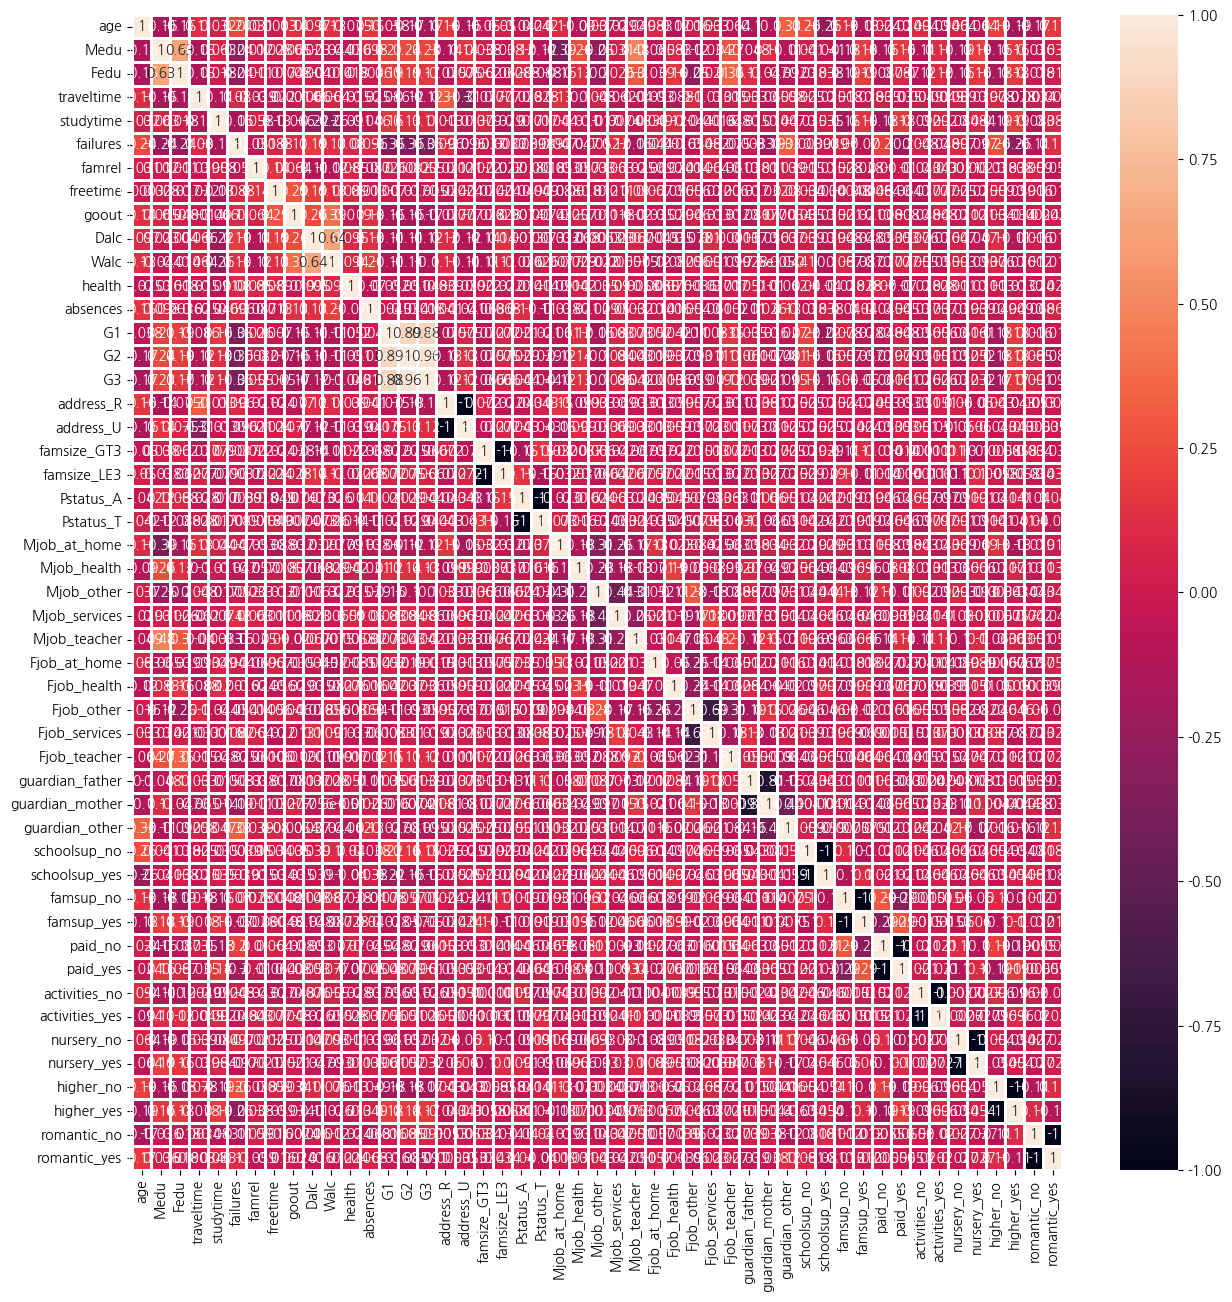

In [59]:
plt.figure(figsize=(15,15))
sns.heatmap(my_data.corr(method='spearman'), annot=True, linecolor='white', linewidths=1)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
lr= LogisticRegression() # 로지스틱은 종속이 범주 0,1 범주가 두 개
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.35443037974683544
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.25      0.20      0.22        15
           3       0.53      0.46      0.49        37
           4       0.30      0.44      0.36        18
           5       0.00      0.00      0.00         7

    accuracy                           0.35        79
   macro avg       0.22      0.22      0.21        79
weighted avg       0.36      0.35      0.35        79



In [63]:
my_data['freetime'].value_counts()

freetime
3    157
4    115
2     64
5     40
1     19
Name: count, dtype: int64

In [64]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components=0.80) # 설명력을 80퍼센트만 할래.
X_pca = pca.fit_transform(X)

In [70]:
X_pca

array([[ 4.16752464e-01,  8.29757386e+00],
       [-1.66962552e+00,  9.02459529e+00],
       [ 4.33873315e+00,  3.72207621e+00],
       [-3.82318243e+00, -6.99183649e+00],
       [-1.67991542e+00,  2.87502302e+00],
       [ 4.18759718e+00, -7.59741400e+00],
       [-5.79251393e+00, -1.59707880e+00],
       [ 4.08576923e-01,  8.34202738e+00],
       [-5.82636509e+00, -1.24449341e+01],
       [-5.85306141e+00, -7.10961197e+00],
       [-5.69821868e+00,  2.71708702e+00],
       [-1.82691475e+00, -1.41479512e+00],
       [-3.77895277e+00, -5.84482977e+00],
       [-3.72002828e+00,  2.84092003e-01],
       [-5.82528017e+00, -8.23693031e+00],
       [-1.74916785e+00, -5.83172025e+00],
       [ 2.49258056e-01, -5.46948362e+00],
       [-1.72890002e+00,  1.96682050e+00],
       [ 1.04310814e+01,  9.32981559e+00],
       [-1.66046852e+00,  1.93821036e+00],
       [-5.78833153e+00, -6.16641013e+00],
       [-5.80590245e+00, -6.20214199e+00],
       [-3.76991450e+00, -8.19468592e+00],
       [-5.

In [77]:
pca.n_components_

2

In [72]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y, test_size=0.2, random_state=10)

In [73]:
lr2= LogisticRegression()
lr2.fit(X_train2,y_train2)
pred2 = lr2.predict(X_test2)
print(accuracy_score(y_test2, pred2))
print(confusion_matrix(y_test2, pred2))
print(classification_report(y_test2, pred2))

0.4177215189873418
[[ 0  1  1  0  0]
 [ 0  0 12  3  0]
 [ 0  1 32  4  0]
 [ 0  0 17  1  0]
 [ 0  0  5  2  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        15
           3       0.48      0.86      0.62        37
           4       0.10      0.06      0.07        18
           5       0.00      0.00      0.00         7

    accuracy                           0.42        79
   macro avg       0.12      0.18      0.14        79
weighted avg       0.25      0.42      0.30        79



In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=10)
rfc.fit(X_train, y_train)
pred  = rfc.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.4050632911392405
[[ 0  0  2  0  0]
 [ 0  1 12  2  0]
 [ 0  1 24 12  0]
 [ 0  2  9  7  0]
 [ 0  0  1  6  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.25      0.07      0.11        15
           3       0.50      0.65      0.56        37
           4       0.26      0.39      0.31        18
           5       0.00      0.00      0.00         7

    accuracy                           0.41        79
   macro avg       0.20      0.22      0.20        79
weighted avg       0.34      0.41      0.36        79



In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=10)
rfc.fit(X_train2, y_train2)
pred  = rfc.predict(X_test2)
print(accuracy_score(y_test2, pred))
print(confusion_matrix(y_test2, pred))
print(classification_report(y_test2, pred))

0.3670886075949367
[[ 0  0  2  0  0]
 [ 0  2  6  7  0]
 [ 1  2 21 10  3]
 [ 0  4 10  4  0]
 [ 0  0  3  2  2]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.25      0.13      0.17        15
           3       0.50      0.57      0.53        37
           4       0.17      0.22      0.20        18
           5       0.40      0.29      0.33         7

    accuracy                           0.37        79
   macro avg       0.26      0.24      0.25        79
weighted avg       0.36      0.37      0.36        79

